In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1635057633867-bbb11bd336b3.jpg
/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1602485467114-f85820ce228f.jpg
/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1633113211800-4acbb59fc254.jpg
/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1541958409-7618fd1ad26e.jpg
/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1638051894614-a60031fc6962.jpg
/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1639033302448-1b98bbf802bf.jpg
/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1637310917417-a270927f4fba.jpg
/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1576442849893-92c987a8ef80.jpg
/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/photo-1635967200497-6a83775bf395

In [2]:
from fastai.vision.all import *
from pathlib import Path
import pandas as pd

In [3]:
# Define the path
path = Path('/kaggle/input')

# Get image files and verify them
fls = get_image_files(path)  # FastAI method to see the files inside the path
failed = verify_images(path) # FastAI method to check if pictures are corrupted

print(f'Corrupted images: {failed}')


'PosixPath' object is not iterable
Corrupted images: []


In [4]:
# Create a DataBlock
cxr = DataBlock(
    blocks = (ImageBlock, CategoryBlock), # ImageBlock for images, CategoryBlock for categories
    get_items = get_image_files, # To get images using FastAI method 
    splitter = RandomSplitter(valid_pct=0.2, seed=42), # To split the data into train and validation sets
    get_y = parent_label, # Assigns each picture's folder name as the picture's label
    item_tfms = Resize(224) # Resize images to 224x224
)


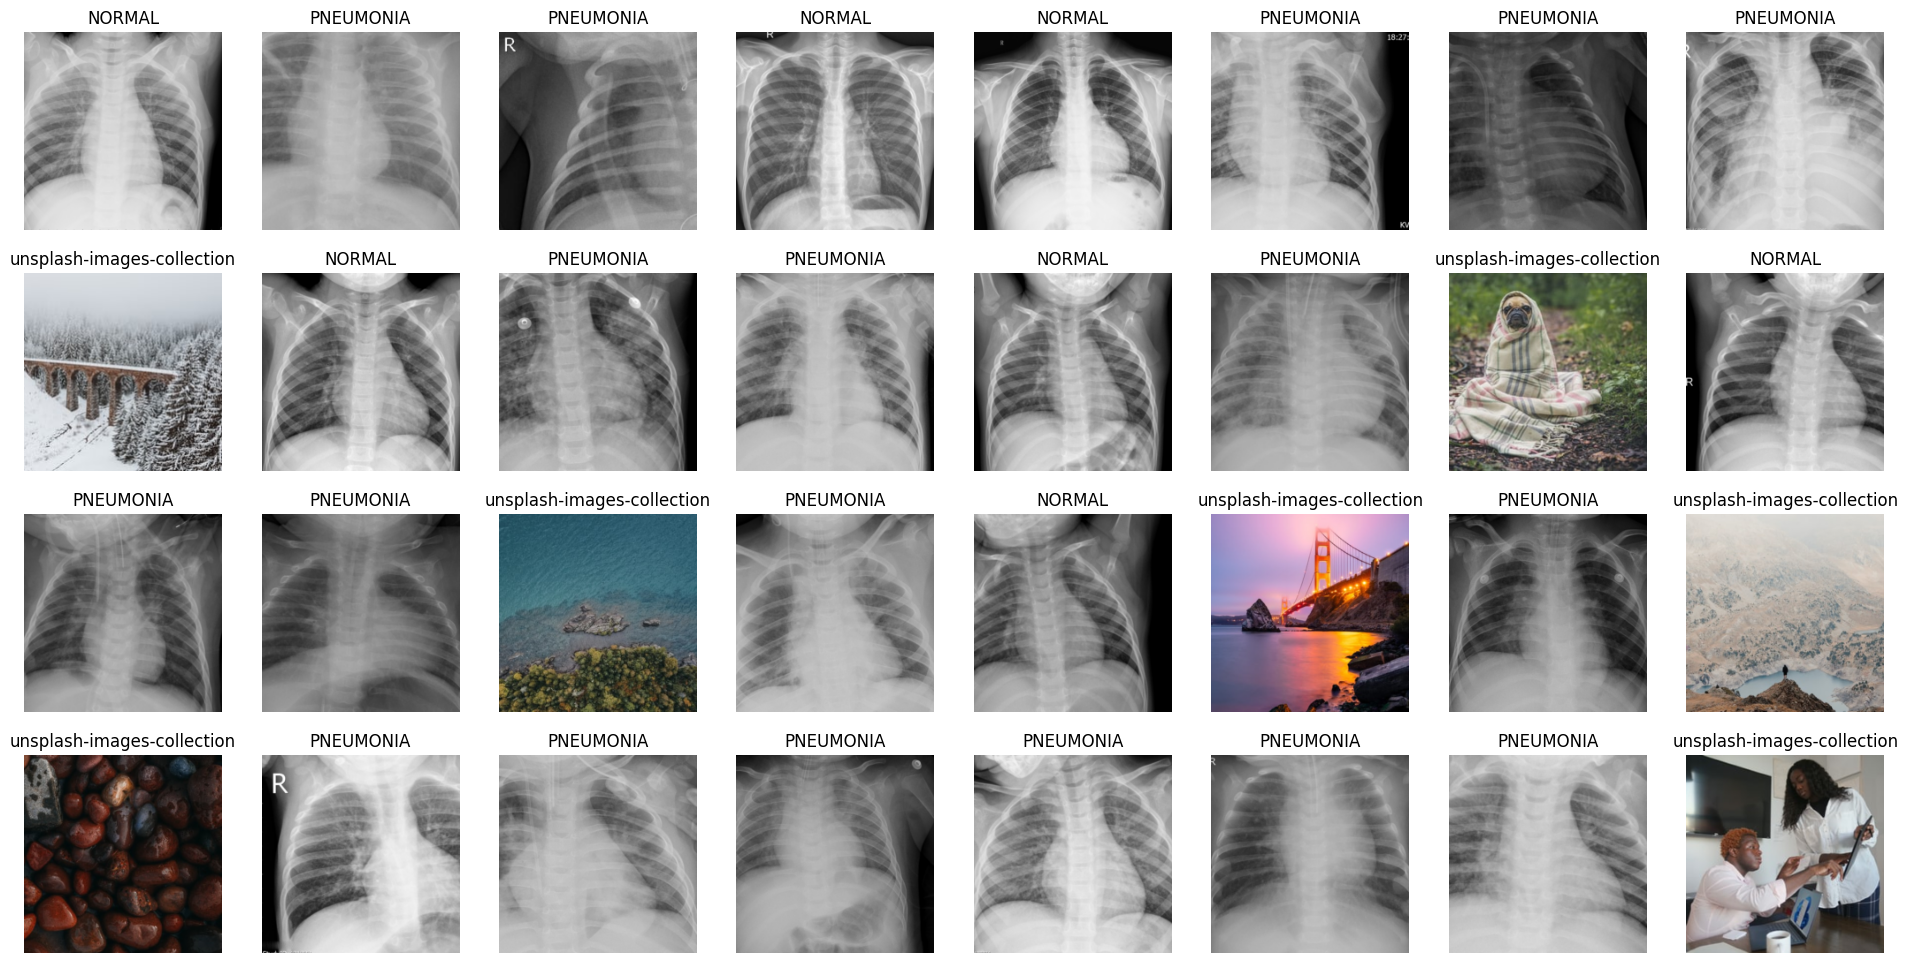

In [5]:
# Create DataLoaders
dls = cxr.dataloaders(path)

# Display some sample images
dls.train.show_batch(max_n=32, nrows=4)


In [6]:
# Train the model
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)


/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 153MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.486515,0.210563,0.939895,01:07


epoch,train_loss,valid_loss,accuracy,time
0,0.150199,0.127255,0.954921,01:05
1,0.080422,0.125231,0.960180,01:06
2,0.049183,0.069690,0.980466,01:06
3,0.023343,0.067435,0.979715,01:06


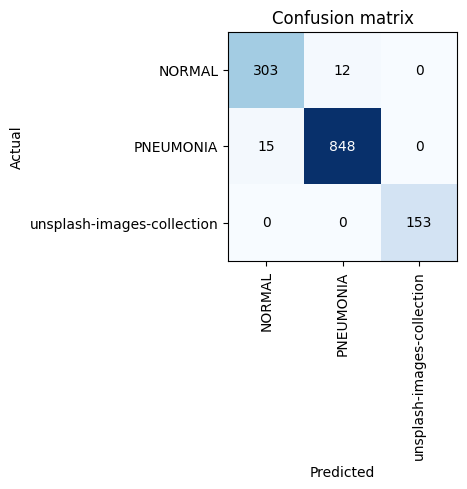

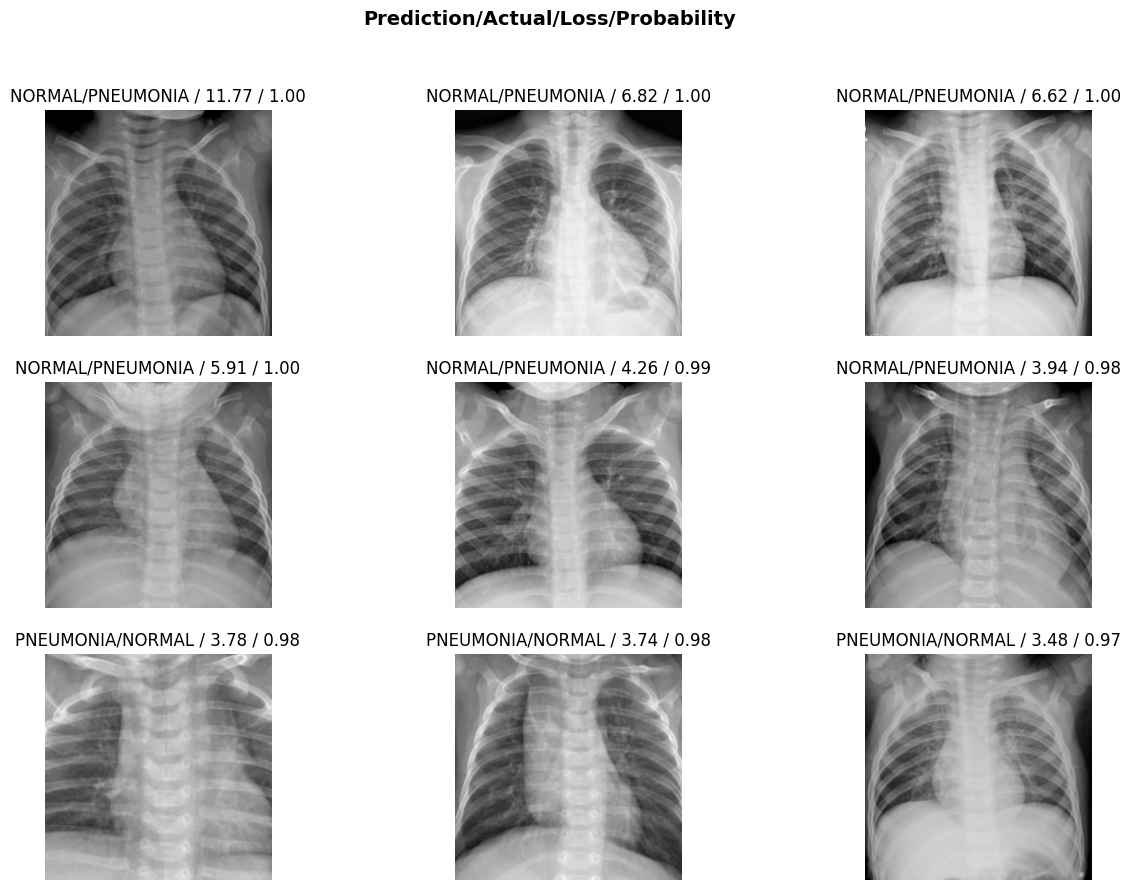

In [7]:
# Evaluate the model on the validation set
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(9, figsize=(15,10))


In [8]:
# Save the model
learn.export('xray_detector_model.pkl')